In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data prep

In [34]:
df_base = pd.read_csv("/Users/jeremyvanvalkenburg/Repositories/datasets/export_base.csv")
df_p2p = pd.read_csv("/Users/jeremyvanvalkenburg/Repositories/datasets/export_p2p.csv")

In [35]:
print("Columns: {}\n".format(", ".join(df_base.columns)))
print("Number of observations: {}".format(len(df_base)))
print("Observations with no visits: {}; observations with visits: {}".format(len(df_base[(df_base.visits==0)&(df_base.visits==0)]), len(df_base[(df_base.visits!=0)&(df_base.visits!=0)])))
df_base.head()

Columns: id, org, form, sic, ein, visits, mobile_visits, vt_trans_count, don_form_trans_count, kiosk_trans_count, p2p_trans_count, mobile_trans_count, mobilevt_trans_count, sms_trans_count, fb_trans_count, vt_trans_vol, don_form_trans_vol, kiosk_trans_vol, p2p_trans_vol, mobile_trans_vol, mobilevt_trans_vol, sms_trans_vol, fb_trans_vol, tm_stamp, one_time_trans_count, one_time_trans_vol, rec_trans_count, rec_trans_vol, product

Number of observations: 8996401
Observations with no visits: 8006284; observations with visits: 990117


,id,org,form,sic,ein,visits,mobile_visits,vt_trans_count,don_form_trans_count,kiosk_trans_count,...,mobile_trans_vol,mobilevt_trans_vol,sms_trans_vol,fb_trans_vol,tm_stamp,one_time_trans_count,one_time_trans_vol,rec_trans_count,rec_trans_vol,product
0,20695269,378883,909424,NaN,742918904,14,0,0,0,0,...,0.0,0.0,0.0,0.0,2017-02-01 00:00:11,0,0.0,0,0.00,1
1,20695270,378883,871535,NaN,742918904,2,0,0,0,0,...,0.0,0.0,0.0,0.0,2017-02-01 00:00:11,0,0.0,0,0.00,1
2,20695271,378883,889982,NaN,742918904,0,0,0,0,0,...,0.0,0.0,0.0,0.0,2017-02-01 00:00:11,0,0.0,0,0.00,1
3,20695272,378883,698437,NaN,742918904,1,0,0,0,0,...,0.0,0.0,0.0,0.0,2017-02-01 00:00:11,0,0.0,28,895.66,1
4,20695273,378883,877654,NaN,742918904,0,0,0,0,0,...,0.0,0.0,0.0,0.0,2017-02-01 00:00:11,0,0.0,0,0.00,1


In [36]:
print("Columns: {}\n".format(", ".join(df_p2p.columns)))
print("Number of observations: {}".format(len(df_p2p)))
df_p2p.head()

Columns: id, base, org, class_count, cat_count, promo_count, rest_count, amt_count, ded_count, fields, opt_fields, req_fields, allows_reg_ind, allows_teams, allows_reg_team_create, allows_reg_team_join, allows_opt_reg_donation, allows_sub_reg, allows_sub_reg_pfp, allows_other_don_amt, allows_pfp_off_don, allows_tfp_off_don, allows_soc_post_pfp_tcp, share_home, share_pfp, share_tfp, share_therm, share_donation, allows_social, social_templt_count, social_auto, pcnt_posts, mon_posts, count_posts, date_posts, email_templt_count, sponsors_count, inappr_content, reg_count, non_fund_reg, sub_reg_count, teams_count, reg_volume, don_volume, don_count

Number of observations: 4029437


,id,base,org,class_count,cat_count,promo_count,rest_count,amt_count,ded_count,fields,...,email_templt_count,sponsors_count,inappr_content,reg_count,non_fund_reg,sub_reg_count,teams_count,reg_volume,don_volume,don_count
0,1465709,5818802,27651,2,1,0,0,4,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1465710,5818810,173,0,2,11,0,4,0,13,...,0,9,5,0,0,0,0,0.0,4040.0,29
2,1465711,5818812,29669,0,6,1,0,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
3,1465712,5818813,29669,1,1,1,0,4,0,1,...,0,1,0,0,0,0,0,0.0,0.0,0
4,1465713,5818816,31718,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [37]:
df_p2p[['allows_reg_ind', 'allows_teams', 'allows_reg_team_create', 
        'allows_reg_team_join', 'allows_opt_reg_donation', 'allows_sub_reg', 
        'allows_sub_reg_pfp', 'allows_other_don_amt', 'allows_pfp_off_don', 
        'allows_tfp_off_don', 'allows_soc_post_pfp_tcp', 'share_home', 
        'share_pfp', 'share_tfp', 'share_therm', 'share_donation', 
        'allows_social']].head()

,allows_reg_ind,allows_teams,allows_reg_team_create,allows_reg_team_join,allows_opt_reg_donation,allows_sub_reg,allows_sub_reg_pfp,allows_other_don_amt,allows_pfp_off_don,allows_tfp_off_don,allows_soc_post_pfp_tcp,share_home,share_pfp,share_tfp,share_therm,share_donation,allows_social
0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1
1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0
2,1,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0
3,1,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0
4,5,5,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0


## filter out entries w/out visits

In [38]:
df_base = df_base[(df_base.visits!=0)&(df_base.visits!=0)]
df_p2p = df_p2p[df_p2p.base.isin(df_base.id.values.tolist())]
print("Number of base observations: {}".format(len(df_base)))
print("Number of p2p observations: {}".format(len(df_p2p)))

Number of base observations: 990117
Number of p2p observations: 268096


## merge dataframes 

In [10]:
df = pd.merge(df_base, df_p2p, left_on='id', right_on='base')
print("Now we have {} observations of P2P forms with non-0 visits".format(len(df)))

Now we have 268096 observations of P2P forms with non-0 visits


# Exploration

In [8]:
df['donation_conversion'] = df['don_count'] / df['visits'] + df['mobile_visits']
df['registration_conversion'] = df['reg_count'] / df['visits'] + df['mobile_visits']
df['donation_mean'] = df['don_volume'] / df['don_count']
print("Mean donation conversion: {}".format(df['donation_conversion'].mean()))
print("Mean donation amount: {}".format(df['donation_mean'].mean()))
print("Mean registration conversion: {}".format(df['registration_conversion'].mean()))

Mean donation conversion: 0.0112478525703
Mean donation amount: 86.6714209489
Mean registration conversion: 0.0


In [9]:
print("Donation conversion: {} out of {} with non-0 conversions; mean: {}".format(len(df[df.donation_conversion!=0]), len(df), df.donation_conversion.mean()))
print("Registration conversion: {} out of {} with non-0 conversions; mean: {}".format(len(df[df.registration_conversion!=0]), len(df), df.registration_conversion.mean()))

Donation conversion: 48521 out of 268096 with non-0 conversions; mean: 0.0112478525703
Registration conversion: 0 out of 268096 with non-0 conversions; mean: 0.0


In [10]:
df[['donation_conversion', 'don_count', 'don_volume', 'reg_count', 'reg_volume']].head()

,donation_conversion,don_count,don_volume,reg_count,reg_volume
0,0.0,0,0.0,0,0.0
1,0.0,0,0.0,0,0.0
2,0.0,0,0.0,0,0.0
3,0.0,0,0.0,0,0.0
4,0.0,0,0.0,0,0.0


In [11]:
c = df[['donation_conversion', 'don_count', 'don_volume', 'donation_mean', 'reg_count', 'class_count', 'cat_count', 'promo_count', 'rest_count', 'amt_count', 'ded_count', 'fields', 'opt_fields', 'req_fields', 'allows_reg_ind', 'allows_teams', 'allows_reg_team_create', 'allows_reg_team_join', 'allows_opt_reg_donation', 'allows_sub_reg', 'allows_sub_reg_pfp', 'allows_other_don_amt', 'allows_pfp_off_don', 'allows_tfp_off_don', 'allows_social', 'sponsors_count']].corr().abs()
c_unstacked = c.unstack()
c_unstacked[5:26]

donation_conversion  class_count                0.005044
                     cat_count                  0.047141
                     promo_count                0.015141
                     rest_count                 0.002628
                     amt_count                  0.012636
                     ded_count                  0.005364
                     fields                     0.028306
                     opt_fields                 0.037459
                     req_fields                 0.011564
                     allows_reg_ind             0.066503
                     allows_teams               0.015026
                     allows_reg_team_create     0.000734
                     allows_reg_team_join       0.003483
                     allows_opt_reg_donation    0.021703
                     allows_sub_reg             0.000567
                     allows_sub_reg_pfp         0.007446
                     allows_other_don_amt       0.000896
                     allows_pfp

In [12]:
c_unstacked[31:52]

don_count  class_count                0.104031
           cat_count                  0.026822
           promo_count                0.007518
           rest_count                 0.008494
           amt_count                  0.029991
           ded_count                  0.037373
           fields                     0.026774
           opt_fields                 0.040852
           req_fields                 0.006632
           allows_reg_ind             0.106651
           allows_teams               0.048644
           allows_reg_team_create     0.006290
           allows_reg_team_join       0.046462
           allows_opt_reg_donation    0.060870
           allows_sub_reg             0.000628
           allows_sub_reg_pfp         0.008257
           allows_other_don_amt       0.000993
           allows_pfp_off_don         0.071268
           allows_tfp_off_don         0.071268
           allows_social              0.002433
           sponsors_count             0.016122
dtype: float6

In [13]:
c_unstacked[57:78]

don_volume  class_count                0.075125
            cat_count                  0.028014
            promo_count                0.012275
            rest_count                 0.009544
            amt_count                  0.009639
            ded_count                  0.043994
            fields                     0.016073
            opt_fields                 0.033515
            req_fields                 0.003160
            allows_reg_ind             0.078250
            allows_teams               0.025398
            allows_reg_team_create     0.008226
            allows_reg_team_join       0.030013
            allows_opt_reg_donation    0.066521
            allows_sub_reg             0.000559
            allows_sub_reg_pfp         0.007345
            allows_other_don_amt       0.000884
            allows_pfp_off_don         0.084175
            allows_tfp_off_don         0.084175
            allows_social              0.002165
            sponsors_count             0

In [14]:
c_unstacked[83:104]

donation_mean  class_count                0.031824
               cat_count                  0.005374
               promo_count                0.012197
               rest_count                 0.015347
               amt_count                  0.039537
               ded_count                  0.021558
               fields                     0.048547
               opt_fields                 0.015503
               req_fields                 0.055043
               allows_reg_ind             0.059826
               allows_teams               0.094560
               allows_reg_team_create     0.064375
               allows_reg_team_join       0.065421
               allows_opt_reg_donation    0.036955
               allows_sub_reg                  NaN
               allows_sub_reg_pfp              NaN
               allows_other_don_amt            NaN
               allows_pfp_off_don         0.037364
               allows_tfp_off_don         0.037364
               allows_social   

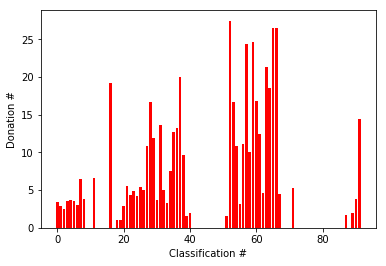

In [15]:
data = df[df['don_count']>0][['don_count', 'class_count']].groupby('class_count').mean()
rects1 = plt.bar(data.index, data.values, color='r')
plt.ylabel('Donation #')
plt.xlabel('Classification #')
plt.show()

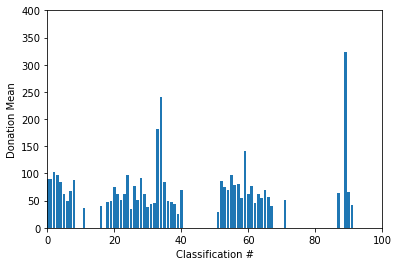

In [16]:
data = df[df['don_count']>0][['donation_mean', 'class_count']].groupby('class_count').mean()

ax1 = plt.subplot(1,1,1)
ax1.bar(data.index, data.values)
ax1.set_xlim([0, 100])
ax1.set_ylim([0, 400])
plt.ylabel('Donation Mean')
plt.xlabel('Classification #')
plt.show()

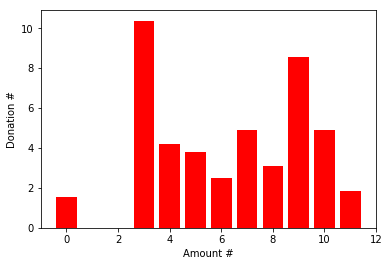

In [17]:
data = df[df['don_count']>0][['don_count', 'amt_count']].groupby('amt_count').mean()
rects1 = plt.bar(data.index, data.values, color='r')
plt.ylabel('Donation #')
plt.xlabel('Amount #')
plt.show()

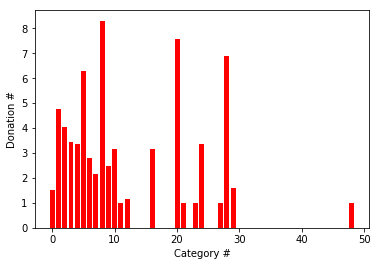

In [18]:
data = df[df['don_count']>0][['don_count', 'cat_count']].groupby('cat_count').mean()
rects1 = plt.bar(data.index, data.values, color='r')
plt.ylabel('Donation #')
plt.xlabel('Category #')
plt.show()

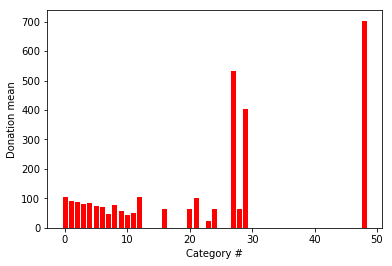

In [19]:
data = df[df['don_count']>0][['donation_mean', 'cat_count']].groupby('cat_count').mean()
rects1 = plt.bar(data.index, data.values, color='r')
plt.ylabel('Donation mean')
plt.xlabel('Category #')
plt.show()

Running some simple modeling to test feature importance and p values

## Modeling against donation conversion

In [20]:
ftrs = ['class_count', 'cat_count', 'promo_count', 'rest_count', 'amt_count', 'ded_count', 
'fields', 'opt_fields', 'req_fields', 'allows_reg_ind', 'allows_teams', 'allows_reg_team_create', 
'allows_reg_team_join', 'allows_opt_reg_donation', 'allows_sub_reg', 'allows_sub_reg_pfp',
'allows_other_don_amt', 'allows_pfp_off_don', 'allows_tfp_off_don']

X_train, X_test, y_train, y_test = train_test_split(df[ftrs], df['donation_conversion'], test_size=0.25)

In [21]:
# gradient boosting regression
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
print("Prediction error: {}".format((y_pred-y_test).mean()))
print("R^2: {}".format(gbr.score(X_test, y_test)))
print("Feature importance:")

coef_dict = {}
for coef, feat in zip(gbr.feature_importances_, ftrs):
    coef_dict[feat] = abs(coef)
import operator
coef_dict_sorted = sorted(coef_dict.items(), key=operator.itemgetter(1))
for c in coef_dict_sorted:
    print("\t{}: {}".format(c[0], c[1]))

Prediction error: 0.000157313732814
R^2: 0.0703551292554
Feature importance:
	allows_sub_reg: 0.0
	allows_other_don_amt: 0.0
	rest_count: 0.0020711971384
	allows_sub_reg_pfp: 0.00352156556953
	allows_tfp_off_don: 0.00725705452449
	allows_teams: 0.00890900573596
	allows_opt_reg_donation: 0.0128051068879
	allows_pfp_off_don: 0.0163414700744
	allows_reg_team_create: 0.0195402821754
	allows_reg_ind: 0.0378393997599
	allows_reg_team_join: 0.0420851956781
	opt_fields: 0.0439279378867
	fields: 0.0571676218899
	promo_count: 0.0738641887587
	ded_count: 0.0773255270583
	req_fields: 0.0918479273809
	class_count: 0.116986657074
	amt_count: 0.148344734911
	cat_count: 0.240165127497


In [22]:
# linear model
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Prediction error: {}".format((y_pred-y_test).mean()))
print("R^2: {}".format(lr.score(X_test, y_test)))
print("Coefficients:")

coef_dict = {}
for coef, feat in zip(lr.coef_, ftrs):
    coef_dict[feat] = abs(coef)
import operator
coef_dict_sorted = sorted(coef_dict.items(), key=operator.itemgetter(1))
for c in coef_dict_sorted:
    print("\t{}: {}".format(c[0], c[1]))

Prediction error: 0.000184206163958
R^2: 0.0140108122966
Coefficients:
	class_count: 1.01190413673e-06
	promo_count: 4.24622380263e-06
	amt_count: 0.000197559410339
	ded_count: 0.000376483389698
	rest_count: 0.000392220062387
	cat_count: 0.000611095299054
	allows_teams: 0.0012082085684
	allows_reg_team_join: 0.00175489388573
	allows_reg_team_create: 0.00365937905594
	allows_sub_reg: 0.00433743804557
	allows_opt_reg_donation: 0.00471346789202
	allows_reg_ind: 0.00763534589203
	allows_sub_reg_pfp: 0.0232253082944
	allows_other_don_amt: 0.0234682510106
	allows_pfp_off_don: 120409587.571
	allows_tfp_off_don: 120409587.574
	opt_fields: 3880202589.78
	fields: 3880202589.78
	req_fields: 3880202589.78


R^2 scores indicate that these models don't explain much of the variability in the data but the intersection of feature importances and normalized coefficients illustrate the re-appearance of the importance of fields to conversion as we see in the Qgiv data. Meanwhile, the linear regression model found very small coefficients for the other features the GBR model found to be most important. Also worth noting is some inverse impact happening between the models where some of the stronger features of one model are the weakest in the other.

Linear model coefficients by magnitude:
1. opt_fields
2. req_fields
3. fields

GBR feature importances:
1. cat_count
2. class_count
3. amt_count
4. req_fields

__Of note is that relatively low testing errors. Assuming for now that this is a result of overfitting but could also be indicative of a relationship that is relatively easy to surface during modeling.__

## Modeling against donation mean

In [23]:
ftrs = ['class_count', 'cat_count', 'promo_count', 'rest_count', 'amt_count', 'ded_count', 
'fields', 'opt_fields', 'req_fields', 'allows_reg_ind', 'allows_teams', 'allows_reg_team_create', 
'allows_reg_team_join', 'allows_opt_reg_donation', 'allows_sub_reg', 'allows_sub_reg_pfp',
'allows_other_don_amt', 'allows_pfp_off_don', 'allows_tfp_off_don']

X_train, X_test, y_train, y_test = train_test_split(df[ftrs], df['donation_mean'], test_size=0.25)
y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

In [24]:
# gradient boosting regression
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
print("Prediction error: {}".format((y_pred-y_test).mean()))
print("R^2: {}".format(gbr.score(X_test, y_test)))
print("Feature importance:")

coef_dict = {}
for coef, feat in zip(gbr.feature_importances_, ftrs):
    coef_dict[feat] = abs(coef)
import operator
coef_dict_sorted = sorted(coef_dict.items(), key=operator.itemgetter(1))
for c in coef_dict_sorted:
    print("\t{}: {}".format(c[0], c[1]))

Prediction error: -0.250034655583
R^2: 0.0667502772551
Feature importance:
	allows_sub_reg_pfp: 0.0
	allows_sub_reg: 0.0
	rest_count: 0.0
	allows_other_don_amt: 0.0
	allows_pfp_off_don: 0.0048992010041
	allows_reg_team_join: 0.00634512699151
	allows_tfp_off_don: 0.0162793587887
	allows_teams: 0.0232162320148
	opt_fields: 0.025571262632
	allows_opt_reg_donation: 0.0262358128531
	allows_reg_team_create: 0.0320793165108
	allows_reg_ind: 0.0338124520201
	ded_count: 0.0624790902123
	fields: 0.0732305381737
	req_fields: 0.0802047339735
	cat_count: 0.127827777614
	amt_count: 0.14448244971
	promo_count: 0.165874957319
	class_count: 0.177461690182


In [25]:
# linear model
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Prediction error: {}".format((y_pred-y_test).mean()))
print("R^2: {}".format(lr.score(X_test, y_test)))
print("Coefficients:")

coef_dict = {}
for coef, feat in zip(lr.coef_, ftrs):
    coef_dict[feat] = abs(coef)
import operator
coef_dict_sorted = sorted(coef_dict.items(), key=operator.itemgetter(1))
for c in coef_dict_sorted:
    print("\t{}: {}".format(c[0], c[1]))

Prediction error: -0.23014058284
R^2: 0.008454944041
Coefficients:
	class_count: 0.0159458863423
	amt_count: 0.0193463574757
	promo_count: 0.228394475506
	cat_count: 0.465215899717
	ded_count: 0.725014483351
	rest_count: 0.950351259403
	allows_teams: 1.03129797494
	allows_reg_team_join: 3.85444220868
	allows_reg_team_create: 4.03303972478
	allows_reg_ind: 6.31661758259
	allows_sub_reg_pfp: 7.78821657558
	allows_opt_reg_donation: 16.4948114973
	allows_sub_reg: 16.6406663799
	allows_other_don_amt: 34.2714068013
	allows_pfp_off_don: 1.37879139423e+11
	allows_tfp_off_don: 1.37879139428e+11
	opt_fields: 3.48779049638e+12
	fields: 3.48779049638e+12
	req_fields: 3.48779049638e+12


## Modeling against donation count

In [26]:
ftrs = ['class_count', 'cat_count', 'promo_count', 'rest_count', 'amt_count', 'ded_count', 
'fields', 'opt_fields', 'req_fields', 'allows_reg_ind', 'allows_teams', 'allows_reg_team_create', 
'allows_reg_team_join', 'allows_opt_reg_donation', 'allows_sub_reg', 'allows_sub_reg_pfp',
'allows_other_don_amt', 'allows_pfp_off_don', 'allows_tfp_off_don']

X_train, X_test, y_train, y_test = train_test_split(df[ftrs], df['don_count'], test_size=0.25)

In [27]:
# gradient boosting regression
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
print("Prediction error: {}".format((y_pred-y_test).mean()))
print("R^2: {}".format(gbr.score(X_test, y_test)))
print("Feature importance:")

coef_dict = {}
for coef, feat in zip(gbr.feature_importances_, ftrs):
    coef_dict[feat] = abs(coef)
import operator
coef_dict_sorted = sorted(coef_dict.items(), key=operator.itemgetter(1))
for c in coef_dict_sorted:
    print("\t{}: {}".format(c[0], c[1]))

Prediction error: -0.005803609141
R^2: 0.354354573023
Feature importance:
	allows_sub_reg_pfp: 0.0
	allows_sub_reg: 0.0
	rest_count: 0.0
	allows_other_don_amt: 0.0
	allows_tfp_off_don: 0.00233334223689
	allows_pfp_off_don: 0.00509272689139
	allows_reg_team_join: 0.00636930203326
	allows_teams: 0.008856269604
	allows_opt_reg_donation: 0.0233325953996
	fields: 0.0403681953996
	allows_reg_team_create: 0.0413921217679
	req_fields: 0.0617195238224
	opt_fields: 0.0668129415152
	ded_count: 0.0676888891713
	promo_count: 0.0743764205996
	allows_reg_ind: 0.0861925404332
	amt_count: 0.0897019643215
	cat_count: 0.09241770094
	class_count: 0.333345465864


In [28]:
# linear model
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Prediction error: {}".format((y_pred-y_test).mean()))
print("R^2: {}".format(lr.score(X_test, y_test)))
print("Coefficients:")

coef_dict = {}
for coef, feat in zip(lr.coef_, ftrs):
    coef_dict[feat] = abs(coef)
import operator
coef_dict_sorted = sorted(coef_dict.items(), key=operator.itemgetter(1))
for c in coef_dict_sorted:
    print("\t{}: {}".format(c[0], c[1]))

Prediction error: -14533455.3273
R^2: -5.61584758371e+17
Coefficients:
	promo_count: 0.010322539804
	class_count: 0.0151885995708
	cat_count: 0.0259312907451
	rest_count: 0.0582473784348
	amt_count: 0.0628655172297
	ded_count: 0.153594608019
	allows_reg_team_join: 0.442343773307
	allows_reg_team_create: 0.601997766379
	allows_sub_reg_pfp: 0.66382742569
	allows_reg_ind: 0.957947526563
	allows_teams: 0.97337773603
	allows_opt_reg_donation: 1.13484038621
	allows_other_don_amt: 2.07887029533
	allows_pfp_off_don: 3512931309.6
	allows_tfp_off_don: 3512931310.38
	opt_fields: 4.08705897914e+11
	fields: 4.08705897914e+11
	req_fields: 4.08705897914e+11
	allows_sub_reg: 4.87045154507e+11


# Transactions to verify donations & recover registrations

In [10]:
trans = pd.read_csv("/Users/jeremyvanvalkenburg/Repositories/datasets/transactions.csv")

IOError: File /Users/jeremyvanvalkenburg/Repositories/datasets/trans.csv does not exist

In [30]:
forms = df.form.unique()
orig_len = len(trans)
trans = trans[trans.form.isin(forms)]
filtered_len = len(trans)
print("Filtering to only transactions for these forms... {} out of {}".format(filtered_len, orig_len))

Filtering to only transactions for these forms... 211058 out of 3675353


In [31]:
trans.columns

Index([u'id', u'org', u'form', u'recurring', u'creatingTransactionFor',
       u'tm_stamp', u'ccType', u'city', u'state', u'zip', u'country',
       u'bill_city', u'bill_state', u'bill_zip', u'bill_country', u'ipAdd',
       u'status', u'amount', u'source', u'gw_error', u'is_fraud',
       u'absolute_amount_diff', u'day_of_week', u'hour', u'absolute_day_diff',
       u'absolute_hour_diff', u'email', u'is_returning_donor',
       u'fraud_within_day', u'fraud_within_hour'],
      dtype='object')

# scratch

In [11]:
import pandas as pd
path = "~/Repositories/datasets/transactions.csv"

In [12]:
df_trans = pd.read_csv(path)

In [13]:
df_trans.columns

Index([u'Unnamed: 0', u'amount', u'creatingTransactionFor', u'donations_amt',
       u'donations_count', u'email', u'events_amt', u'events_count',
       u'events_tickets', u'form', u'id', u'org', u'purchases_amt',
       u'purchases_count', u'purchases_quantity', u'recurring',
       u'recurring_creatingTransaction', u'registrations_amt',
       u'registrations_count', u'source', u'state', u'timestamp',
       u'transDonationEntity', u'transDonationEntityType', u'zip'],
      dtype='object')

In [14]:
print("Total observations: {}".format(len(df_trans)))
print("Total w/ registrations: {}".format(len(df_trans[df_trans.registrations_count>0])))

Total observations: 3359267
Total w/ registrations: 103516


In [15]:
df_trans[df_trans.registrations_count>0].registrations_count.describe()

count    103516.000000
mean          1.368726
std           1.224148
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          74.000000
Name: registrations_count, dtype: float64

In [16]:
df_trans[df_trans.registrations_amt>0].registrations_amt.describe()

count    55932.000000
mean        39.955713
std         60.798777
min          1.000000
25%         20.000000
50%         30.000000
75%         40.000000
max       2500.000000
Name: registrations_amt, dtype: float64

In [8]:
df_base = pd.read_csv("/Users/jeremyvanvalkenburg/Repositories/datasets/export_base.csv")
df_p2p = pd.read_csv("/Users/jeremyvanvalkenburg/Repositories/datasets/export_p2p.csv")

In [9]:
df_base = df_base[(df_base.visits!=0)&(df_base.visits!=0)]
df_p2p = df_p2p[df_p2p.base.isin(df_base.id.values.tolist())]
df = pd.merge(df_base, df_p2p, left_on='id', right_on='base')

In [17]:
df.columns

Index([u'id_x', u'org_x', u'form', u'sic', u'ein', u'visits', u'mobile_visits',
       u'vt_trans_count', u'don_form_trans_count', u'kiosk_trans_count',
       u'p2p_trans_count', u'mobile_trans_count', u'mobilevt_trans_count',
       u'sms_trans_count', u'fb_trans_count', u'vt_trans_vol',
       u'don_form_trans_vol', u'kiosk_trans_vol', u'p2p_trans_vol',
       u'mobile_trans_vol', u'mobilevt_trans_vol', u'sms_trans_vol',
       u'fb_trans_vol', u'tm_stamp', u'one_time_trans_count',
       u'one_time_trans_vol', u'rec_trans_count', u'rec_trans_vol', u'product',
       u'id_y', u'base', u'org_y', u'class_count', u'cat_count',
       u'promo_count', u'rest_count', u'amt_count', u'ded_count', u'fields',
       u'opt_fields', u'req_fields', u'allows_reg_ind', u'allows_teams',
       u'allows_reg_team_create', u'allows_reg_team_join',
       u'allows_opt_reg_donation', u'allows_sub_reg', u'allows_sub_reg_pfp',
       u'allows_other_don_amt', u'allows_pfp_off_don', u'allows_tfp_off_don',
 

In [28]:
df[['form', 'tm_stamp', 'reg_count', 'reg_volume']].columns
df['tm_stamp'] = pd.to_datetime(df['tm_stamp'])
df_trans['timestamp'] = pd.to_datetime(df_trans['timestamp'])

In [30]:
from datetime import datetime, timedelta

reg_data = []
for f in df.form.unique():
    print("\tWorking on form {}".format(f))
    for d in df[df.form==f].tm_stamp:
        cutoff_delta = d - timedelta(hours=6)
        these_trans = df_trans[(df_trans.form==f)&(df_trans.timestamp>cutoff_delta)&(df_trans.timestamp<d)]
        reg_count = these_trans.registrations_count.sum()
        reg_amt = these_trans.registrations_amt.sum()
        reg_data.append({
            'form': 
            'reg_count': reg_count,
            'reg_amt': reg_amt
        })

	Working on form 847971
	Working on form 874626
	Working on form 885845
	Working on form 856231
	Working on form 833695
	Working on form 903281
	Working on form 900204
	Working on form 911454
	Working on form 911471
	Working on form 782407
	Working on form 871515
	Working on form 843863
	Working on form 796744
	Working on form 910433
	Working on form 855138
	Working on form 909423
	Working on form 819308
	Working on form 899176
	Working on form 902257
	Working on form 899177
	Working on form 847978
	Working on form 581700
	Working on form 787527
	Working on form 828534
	Working on form 855126
	Working on form 911450
	Working on form 910438
	Working on form 888928
	Working on form 890975
	Working on form 912486
	Working on form 886869
	Working on form 879707
	Working on form 863322
	Working on form 632900
	Working on form 889956
	Working on form 895064
	Working on form 751684
	Working on form 521285
	Working on form 801885
	Working on form 820342
	Working on form 819315
	Working on form

In [31]:
reg_data

[{'reg_amt': 0, 'reg_count': 0},
 {'reg_amt': 0, 'reg_count': 0},
 {'reg_amt': 0, 'reg_count': 0},
 {'reg_amt': 0, 'reg_count': 0},
 {'reg_amt': 0.0, 'reg_count': 0L},
 {'reg_amt': 0.0, 'reg_count': 0L},
 {'reg_amt': 0.0, 'reg_count': 0L},
 {'reg_amt': 0.0, 'reg_count': 0L},
 {'reg_amt': 0.0, 'reg_count': 0L},
 {'reg_amt': 0.0, 'reg_count': 0L},
 {'reg_amt': 0.0, 'reg_count': 0L},
 {'reg_amt': 0.0, 'reg_count': 0L},
 {'reg_amt': 0.0, 'reg_count': 0L},
 {'reg_amt': 0.0, 'reg_count': 0L},
 {'reg_amt': 0, 'reg_count': 0},
 {'reg_amt': 0.0, 'reg_count': 0L},
 {'reg_amt': 0, 'reg_count': 0},
 {'reg_amt': 0, 'reg_count': 0},
 {'reg_amt': 0.0, 'reg_count': 0L},
 {'reg_amt': 0, 'reg_count': 0},
 {'reg_amt': 0.0, 'reg_count': 0L},
 {'reg_amt': 0.0, 'reg_count': 0L},
 {'reg_amt': 0, 'reg_count': 0},
 {'reg_amt': 0.0, 'reg_count': 0L},
 {'reg_amt': 100.0, 'reg_count': 1L},
 {'reg_amt': 200.0, 'reg_count': 2L},
 {'reg_amt': 200.0, 'reg_count': 2L},
 {'reg_amt': 200.0, 'reg_count': 2L},
 {'reg_amt'

In [32]:
len(reg_data)

268096

In [33]:
len(df)

268096

In [34]:
rd_df = pd.DataFrame(reg_data)

In [35]:
rd_df.head()

,reg_amt,reg_count
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0


In [59]:
df.reg_count = rd_df.reg_count
df['reg_amt'] = rd_df.reg_amt

In [60]:
for c in df.columns:
    if 'reg' in c:
        print(c)

allows_reg_ind
allows_reg_team_create
allows_reg_team_join
allows_opt_reg_donation
allows_sub_reg
allows_sub_reg_pfp
reg_count
non_fund_reg
sub_reg_count
reg_volume
reg_amt


In [41]:
df.columns

Index([u'id_x', u'org_x', u'form', u'sic', u'ein', u'visits', u'mobile_visits',
       u'vt_trans_count', u'don_form_trans_count', u'kiosk_trans_count',
       u'p2p_trans_count', u'mobile_trans_count', u'mobilevt_trans_count',
       u'sms_trans_count', u'fb_trans_count', u'vt_trans_vol',
       u'don_form_trans_vol', u'kiosk_trans_vol', u'p2p_trans_vol',
       u'mobile_trans_vol', u'mobilevt_trans_vol', u'sms_trans_vol',
       u'fb_trans_vol', u'tm_stamp', u'one_time_trans_count',
       u'one_time_trans_vol', u'rec_trans_count', u'rec_trans_vol', u'product',
       u'class_count', u'cat_count', u'promo_count', u'rest_count',
       u'amt_count', u'ded_count', u'fields', u'opt_fields', u'req_fields',
       u'allows_reg_ind', u'allows_teams', u'allows_reg_team_create',
       u'allows_reg_team_join', u'allows_opt_reg_donation', u'allows_sub_reg',
       u'allows_sub_reg_pfp', u'allows_other_don_amt', u'allows_pfp_off_don',
       u'allows_tfp_off_don', u'allows_soc_post_pfp_tcp', u

In [42]:
df['id'] = df.id_x
df['org'] = df.org_x
df.drop(['id_x', 'org_x'], axis=1, inplace=True)

In [28]:
drop_cols = ['product', 'sms_trans_vol', 'p2p_trans_vol', 'kiosk_trans_vol', 
             'fb_trans_count', 'sms_trans_count', 'kiosk_trans_count', 'p2p_trans_count', 
             'mobile_visits', 'vt_trans_count', 'vt_trans_vol', 'don_form_trans_count', 
             'don_form_trans_vol', 'form', 'fb_trans_vol', 
             'one_time_trans_count', 'one_time_trans_vol', 'rec_trans_count', 
             'rec_trans_vol', 'mobile_trans_count', 'mobile_trans_vol', 
             'mobilevt_trans_count', 'mobilevt_trans_vol', 'reg_volume']
corrs = df.drop(drop_cols, axis=1).corr()
corrs_unstkd = corrs.unstack()
corrs_unstkd['reg_count']

id_x                      NaN
org_x                     NaN
sic                       NaN
visits                    NaN
id_y                      NaN
base                      NaN
org_y                     NaN
class_count               NaN
cat_count                 NaN
promo_count               NaN
rest_count                NaN
amt_count                 NaN
ded_count                 NaN
fields                    NaN
opt_fields                NaN
req_fields                NaN
allows_reg_ind            NaN
allows_teams              NaN
allows_reg_team_create    NaN
allows_reg_team_join      NaN
allows_opt_reg_donation   NaN
allows_sub_reg            NaN
allows_sub_reg_pfp        NaN
allows_other_don_amt      NaN
allows_pfp_off_don        NaN
allows_tfp_off_don        NaN
allows_soc_post_pfp_tcp   NaN
share_home                NaN
share_pfp                 NaN
share_tfp                 NaN
share_therm               NaN
share_donation            NaN
allows_social             NaN
social_tem

In [65]:
corrs_unstkd['reg_amt']

sic                       -0.002989
visits                    -0.002171
class_count               -0.002278
cat_count                  0.007043
promo_count                0.001696
rest_count                -0.000508
amt_count                  0.003110
ded_count                 -0.002439
fields                     0.002158
opt_fields                 0.000552
req_fields                 0.002712
allows_reg_ind             0.000548
allows_teams               0.003068
allows_reg_team_create    -0.000979
allows_reg_team_join      -0.000532
allows_opt_reg_donation   -0.002593
allows_sub_reg             0.000229
allows_sub_reg_pfp         0.006545
allows_other_don_amt       0.000362
allows_pfp_off_don        -0.000329
allows_tfp_off_don        -0.000329
allows_soc_post_pfp_tcp         NaN
share_home                      NaN
share_pfp                       NaN
share_tfp                       NaN
share_therm                     NaN
share_donation                  NaN
allows_social             -0

In [31]:
corrs_unstkd['don_volume']

id_x                      -0.011542
org_x                      0.060593
sic                       -0.011352
visits                     0.707895
id_y                      -0.011526
base                      -0.011542
org_y                      0.060593
class_count                0.075125
cat_count                 -0.028014
promo_count                0.012275
rest_count                -0.009544
amt_count                 -0.009639
ded_count                  0.043994
fields                    -0.016073
opt_fields                -0.033515
req_fields                 0.003160
allows_reg_ind            -0.078250
allows_teams               0.025398
allows_reg_team_create     0.008226
allows_reg_team_join       0.030013
allows_opt_reg_donation   -0.066521
allows_sub_reg             0.000559
allows_sub_reg_pfp        -0.007345
allows_other_don_amt       0.000884
allows_pfp_off_don        -0.084175
allows_tfp_off_don        -0.084175
allows_soc_post_pfp_tcp         NaN
share_home                  

In [32]:
corrs_unstkd['don_count']

id_x                      -0.013355
org_x                      0.087660
sic                       -0.024919
visits                     0.878652
id_y                      -0.013342
base                      -0.013355
org_y                      0.087660
class_count                0.104031
cat_count                 -0.026822
promo_count                0.007518
rest_count                -0.008494
amt_count                 -0.029991
ded_count                  0.037373
fields                    -0.026774
opt_fields                -0.040852
req_fields                -0.006632
allows_reg_ind            -0.106651
allows_teams               0.048644
allows_reg_team_create     0.006290
allows_reg_team_join       0.046462
allows_opt_reg_donation   -0.060870
allows_sub_reg             0.000628
allows_sub_reg_pfp        -0.008257
allows_other_don_amt       0.000993
allows_pfp_off_don        -0.071268
allows_tfp_off_don        -0.071268
allows_soc_post_pfp_tcp         NaN
share_home                  